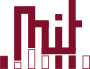 Department of Artificial Intelligence and Systems Engineering, ©2024, BME-MIT, Gabor Revy, Mihaly Vetro, Dr. Gabor Hullam  
# **VIMIAC16 - Artificial Intelligence**
## 2024 Fall Semester
## **LAB 6 - Convolutional neural networks**

## Objective of the Lab
The objective of the lab is to familiarize students with the operation and use of convolutional neural networks, which have become indispensable in the field of automatic image processing and machine vision.


# B. Theoretical Background

## B.1 Mathematical foundations: Vectors

The vectors known from coordinate geometry are typically denoted by ordered pairs $[a, b]$, where the first element (or $x$ coordinate) can be interpreted as the distance measured from the y-axis in the **Cartesian coordinate system**, and the second element (or $y$ coordinate) as the distance from the x-axis. Thus, we can represent the position vector with an arrow pointing from the origin to the point $x = a$, $y = b$.
Using such pairs of numbers, every point in the plane can be described, and shapes in the plane can be formed from sets of points. (For example, the equation of a line: the set of points $[a, b]$ in the plane for which, given certain weights $w_0$, $w_1$, it holds that $b = a * w_1 + w_0$, the equation of a circle, etc.)

#### **Operations with Vectors**

From our previous knowledge, we know that:
- The sum of two vectors: $$ [a_1, b_1] + [a_2, b_2] = [a_1+a_2, b_1+b_2],$$ which is a pair formed by the sum of the coordinates.
- A scalar multiple of a vector: $$ c \cdot [a_1, b_1] = [c \cdot a_1, c \cdot b_1],$$ is a pair formed by multiplying the coordinates by a given scalar.
- The scalar product of two vectors: $$\langle [a_1, b_1], [a_2, b_2] \rangle = a_1  \cdot a_2 + b_1 \cdot b_2,$$ is the sum of the products of the corresponding coordinates. It is important to highlight that the result of this operation, unlike the previous two, is not a vector, but a number (scalar).

#### **Distance**

There are several possible methods for measuring the distance between two points. The first and most well-known is the **Euclidean distance**, calculated for points $P_1=[a_1, b_1]$ and $P_2=[a_2, b_2]$ as $$d_e(P_1, P_2) =  \sqrt{(a_1-a_2)^2 + (b_1-b_2)^2 }.$$

However, for certain problems, it may be worthwhile to apply different metrics of distance. A famous example of a distance metric different from the usual Euclidean distance is the **Manhattan distance**, named after the famously grid-like streets of Manhattan. It is calculated for points $P_1=[a_1, b_1]$ and $P_2=[a_2, b_2]$ as $$d_m(P_1, P_2) = |a_1-a_2| + |b_1-b_2|,$$ meaning the distance is the sum of the differences in the x coordinates and the y coordinates. It's as if we were calculating how much walking it would take to get from one point to another in Manhattan.

Altough the following distance function is an extreme example, but the triangle inequality holds, and in certain cases it can be useful:
$$d_0(P_1, P_2)=\begin{cases} 0, & \text{if } a_1=a_2 \;\text{and}\; b_1=b_2 \\  1, & \text{otherwise}. \end{cases}$$

#### **Higher-Dimensional Vectors**
The concept of vectors can be extended to ordered triples. Thus, we have the opportunity to describe spatial points and shapes similarly to the above. We can define the three basic operations and extend the distance metrics accordingly on triples.

Thus, the scalar product, for example, becomes:
$$\langle [a_1, b_1, c_1], [a_2, b_2, c_2] \rangle = a_1 \cdot a_2 + b_1 \cdot b_2 + c_1 \cdot c_2,$$
while the Euclidean distance between two points can be expressed as:
$$d_e(P_1, P_2) =  \sqrt{(a_1-a_2)^2 + (b_1-b_2)^2 + (c_1-c_2)^2}.$$

There are no theoretical barriers to extending our concept of vectors to numbers of _n_ dimensions, allowing us to interpret previous operations and distances for vectors and points in n-dimensional space without difficulty. Naturally, we cannot easily create interpretable diagrams or visualize shapes formed from these points and vectors, but a thorough understanding of the operations allows us to work with them and draw conclusions about the world they describe.

Let’s take an example of higher-dimensional data. If a doctor wants to describe their patients with two numbers, they could assign a $[$_height, weight_$]$ vector to each patient. Based on the data available, the doctor could create a diagram where data points corresponding to similar body types are close to each other. We can say that if the distance between two vectors is small, then the two patients are similar; if this distance is $0$, they are indistinguishable based on the available data.

If the doctor wants to make the patients more distinguishable, they can represent them in a three-dimensional diagram based on the $[$_height, weight, age_$]$ vector. It becomes clear that previously indistinguishable people can now be "20 years apart" from each other. By adding more data, we can gain even deeper insights about our patients. Suppose we have a vector $[$_height, weight, age, pulse, systolic blood pressure, diastolic blood pressure, body temperature, eye diopter, etc..._$]$. It is no longer a simple task to create an illustrative diagram of the patients, but we can attempt to find similar patients to identify potential victims of a disease. To do this, we can search for points close to those associated with infected individuals among the recorded points. If we find enough close points, we can alert the respective patients or refer them for screening, thereby preventing more significant issues.

We can also pre-divide the entire space into zones according to whether the points there (to which real patients do not necessarily have to belong) would likely be healthy or sick based on the available data. Thus, if a new patient arrives, after performing the required general examinations, we can easily determine whether they need to be referred for further specialized testing.



## B.2 Convolution

Convolution is a frequently used operation in signal processing and particularly in image processing. Instead of a comprehensive and mathematically precise definition of the operation, let's look at an example of the most important discrete 2D convolution for image processing applications.

<center><img width="500" height="280" src="https://miro.medium.com/max/669/1*Zx-ZMLKab7VOCQTxdZ1OAw.gif">
<a href="https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1">source</a>
</center>

Consider the 5x5 matrix $A$, which represents the input image, along with a 3x3 matrix $K$ (known as the kernel matrix):

$$
A=
\left(\begin{array}{cc}
3 & 3 & 2 & 1 & 0\\
0 & 0 & 1 & 3 & 1\\
3 & 1 & 2 & 2 & 3\\
2 & 0 & 0 & 2 & 2\\
2 & 0 & 0 & 0 & 1
\end{array}\right)
K =
\left(\begin{array}{cc}
0 & 1 & 2\\
2 & 2 & 0\\
0 & 1 & 2
\end{array}\right)
$$

Let $A * K$ denote the convolution of the two matrices. The elements of the resulting matrix $B = A * K$ can be computed as follows: we slide the $K$ matrix over all possible positions of the $A$ matrix and, at each position, calculate the product of the elements at corresponding positions, then sum these values. Performing the operation as illustrated in the animation, we obtain:
$$A * K = B =
\left(\begin{array}{cc}
12 & 12 & 17\\
10 & 17 & 19\\
9 & 6 & 14
\end{array}\right),$$
where, for example, $14 = 2 \cdot 0 + 2 \cdot 1 + 3 \cdot 2 + 0 \cdot 2 + 2 \cdot 2 + 2 \cdot 0 + 0 \cdot 0 + 0 \cdot 1 + 1 \cdot 2$.

It is evident that the output matrix $B$ is smaller than the input matrix $A$. To avoid this, the input must be padded with extra pixels. There are several methods for this padding, but the most common is zero-padding. This addition is referred to as _padding_. An example animation demonstrating this can also be found by following the source of the animation above.


## B.3 Convolutional Neural Networks

The convolution operation is particularly significant in image processing. It can be found in both hidden and direct applications in commercially available image editing applications. It can be used for sharpening images, highlighting features, or implementing many other more complex filters.

The results of applying various convolutional kernels directly:

**Blurring**
<center><img src="https://www.pyimagesearch.com/wp-content/uploads/2016/06/convolutions_opencv_largeblur-768x286.jpg" width="350"></center>

**Sharpening**
<center><img src="https://www.pyimagesearch.com/wp-content/uploads/2016/06/convolutions_opencv_sharpen-768x288.jpg" width="350"></center>

**Edge Detection**
<center><img src="https://www.pyimagesearch.com/wp-content/uploads/2016/06/convolutions_opencv_sobelx-768x295.jpg" width="350"></center>

[in this](https://www.pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/) tutorial.

As with the goal of a regular feedforward neural network, where we sought to determine certain parameters of a model through optimization rather than pre-calculation, our aim with Convolutional Neural Networks (CNNs) is to learn kernels that help the network in automatic decision-making by highlighting various features of the image.

For this, we will use a structure similar to that of the previous neural network, but in this case, we will replace the neurons that "produce numbers" with channels that "produce images" (image matrices). We will also replace the weights between successive layers with convolutional kernels.

In addition to feature-extracting convolutional layers, a CNN can have many other types of layers. Here, we would like to highlight the resizing layers. Their necessity arises from the fact that input images are typically high-resolution but contain little information (e.g. one object per image). To provide a more compact representation of the information and to facilitate easier processing, we progressively shrink the images. For this, we use _pooling layers_, of which MaxPooling will appear in Task 3. This operation is simple: using a configurable window size (similar to convolution), we scan the image and select the maximum value from each window. This is typically done with non-overlapping windows, where the step size matches the window size.

Let's look at an example of MaxPooling with a $2\times2$ window size:
$$
\left(\begin{array}{cc}
7 & 3 & 5 & 2\\
8 & 7 & 1 & 6\\
4 & 9 & 3 & 9\\
0 & 8 & 4 & 5
\end{array}\right)
\Rightarrow
\left(\begin{array}{cc}
8 & 6\\
9 & 9
\end{array}\right)
$$

A clear demonstration of the sequential application of convolutional and max pooling layers can be found in [this example project](http://scs.ryerson.ca/~aharley/vis/conv/flat.html), which utilized a CNN for handwritten digit recognition.

These models are characterized by the fact that in deeper layers, the features that assist the network in decision-making become incomprehensible even to humans.


The following table provides a good rule of thumb for how to set certain properties of a neural network based on the task type.

| **Task Type**                          | **Number of Neurons in Last Layer** | **Activation in Hidden Layer(s)** | **Activation in Output Layer** | **Loss Function**                |
|----------------------------------------|-------------------------------------|-----------------------------------|--------------------------------|----------------------------------|
| binary classification                  | 1                                   | ReLU                              | sigmoid                         | binary cross-entropy             |
| multi-class, single-label classification | number equal to classes            | ReLU                              | softmax                         | categorical cross-entropy        |
| multi-class, multi-label classification | number equal to classes            | ReLU                              | sigmoid (separate for each class)| binary cross-entropy             |
| regression to arbitrary values        | 1                                   | ReLU                              | -                               | MSE                              |
| regression to values between 0 and 1  | 1                                   | ReLU                              | sigmoid                         | MSE/binary cross-entropy         |


Alább láthatóak a leggyakoribb aktivációs függvények.  

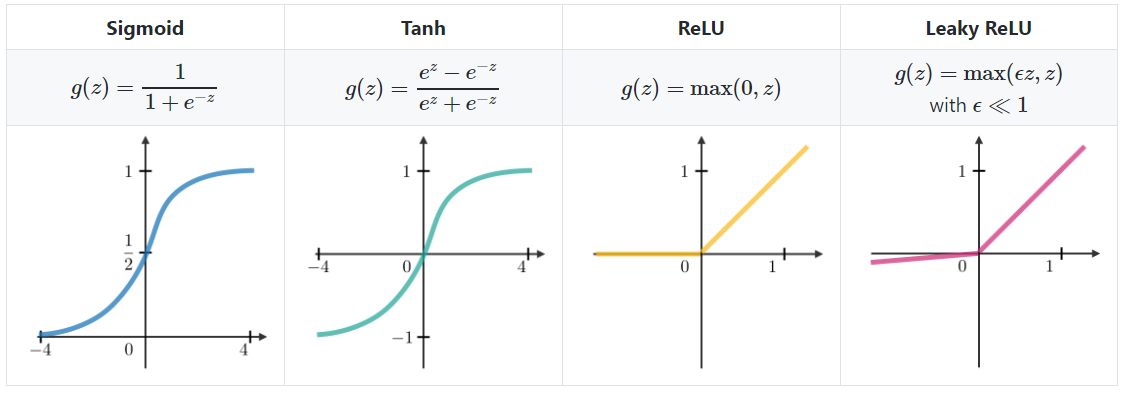

# 0. Preparation

Under the Runtime menu, click on the Change runtime type option and set the "hardware accelerator type" to GPU to use it as the hardware accelerator in the runtime environment!

# T1. Image Classification

In this task, we will classify images of dogs and cats. The input to the neural network will be an RGB image (height x width x 3), and the output will be a binary encoding of the class (0 or 1).

The dataset we will use: [Cats vs Dogs](https://www.tensorflow.org/datasets/catalog/cats_vs_dogs)

We will use the TensorFlow [Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) API for data handling.

Let's import the necessary packages:
- [TensorFlow](https://www.tensorflow.org/overview): an open-source library for machine learning that will be used to build, train, and evaluate models.
- [NumPy](https://numpy.org/): this library provides extensive support for the storage of multidimensional arrays and matrices, as well as mathematical operations and functions. This will be used for data preparation and visualization in this lab.
- [matplotlib.pyplot](https://matplotlib.org/api/pyplot_api.html): for creating and displaying plots.
- `os`: for operating system operations such as file reading, downloading, etc.

In [17]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

# check tf version
print(tf.__version__)

gpus = tf.config.list_physical_devices('GPU')
for device in gpus:
    tf.config.experimental.set_memory_growth(device, True)
    print(f"Found GPU {device.name}, and set memory growth to True.")

2.17.1


RuntimeError: Physical devices cannot be modified after being initialized

## T1.1 Loading the Data

We can download and split the dataset using the `tensorflow_datasets.load` function.
When training neural networks, we typically use three datasets:
- **Training (train)**: the neural network learns exclusively from these data samples.
- **Validation (validation)**: we use this dataset to evaluate the model's performance during training; if performance does not improve on this set, it is advisable to stop training.
- **Test (test)**: we evaluate the model on this dataset after training; it must be independent of the validation dataset, as the validation set plays a role in determining training parameters.

Since the original dataset does not contain validation and test partitions, we will split the `train` portion into 80% for training, 10% for validation, and 10% for testing.
To do this, we will use the [Slicing API](https://www.tensorflow.org/datasets/splits). It is worth checking the Slicing → Percent option here.

Using the original *train* dataset, let's create training, validation, and test partitions!

In [3]:
(train_dataset, val_dataset, test_dataset), dataset_info = \
            tfds.load('cats_vs_dogs',
                      # TODO:
                      split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
                      shuffle_files=False, with_info=True, as_supervised=True)

classes = dataset_info.features['label'].names  # label name of the classes
n_classes = len(classes)  # number of classes

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.LS6MOC_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


## T1.2 Exploring the Dataset


By running the following code block, we can see samples from the training dataset, which includes dog and cat images along with their corresponding labels.


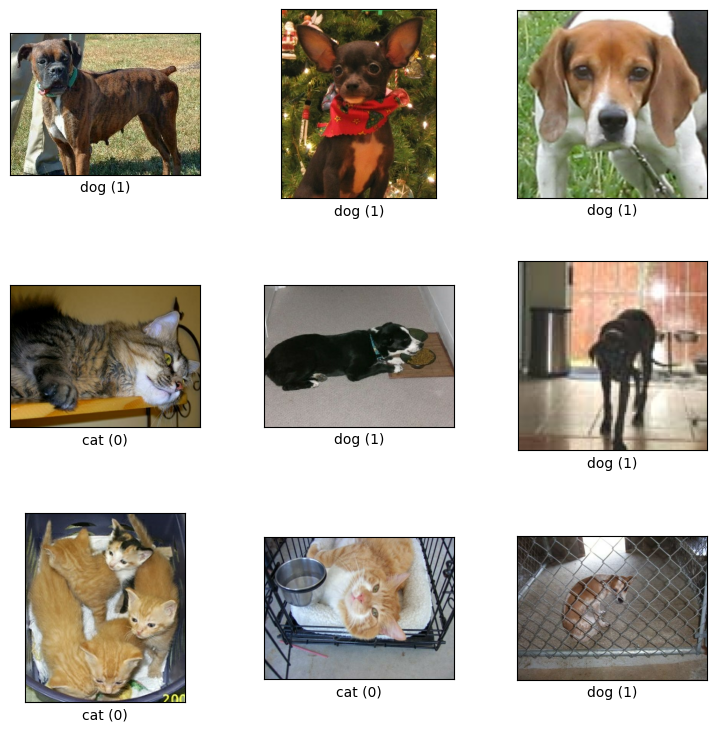

In [4]:
tfds.visualization.show_examples(train_dataset, dataset_info);

## T1.3 Data Preparation

For training, we will shuffle the data, normalize the images to the range $[0, 1]$, resize them to a fixed size of 256 x 256, and create batches. Creating batches is necessary because all images and labels cannot fit in memory at once.


In [5]:
IMAGE_RESOLUTION = 256
def resize_image(image, label):
  image = tf.image.resize_with_pad(image, IMAGE_RESOLUTION, IMAGE_RESOLUTION) / 255.
  return image, label

BATCH_SIZE = 64
train_batches = train_dataset.shuffle(len(train_dataset)//4).map(resize_image).batch(BATCH_SIZE).prefetch(1)
val_batches = val_dataset.map(resize_image).batch(BATCH_SIZE).prefetch(1)
test_batches = test_dataset.map(resize_image).batch(BATCH_SIZE).prefetch(1)

In [6]:
print('dataset:')
print(f'  # training images: {len(train_dataset)}')
print(f'  # validation images: {len(val_dataset)}')
print(f'  # test images: {len(test_dataset)}')

dataset:
  # training images: 18610
  # validation images: 2326
  # test images: 2326


Let's check if the data is sufficiently balanced! If one class is significantly overrepresented and we do not address this, the network will only learn to predict the class that yields better results.

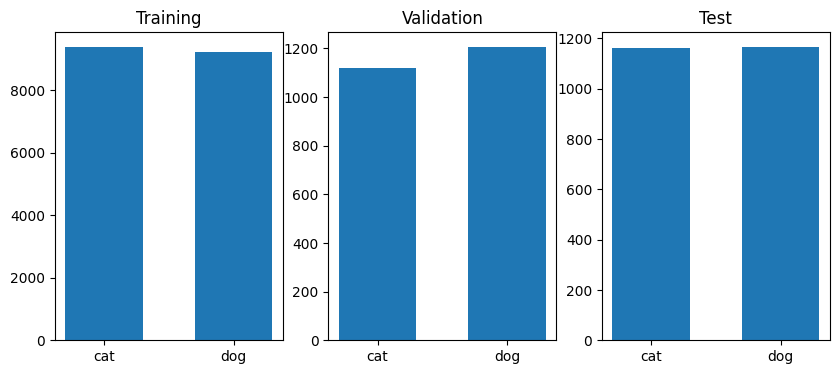

In [9]:
def plot_label_frequencies(ds_names, ds, classes):
  fig_ds, axes = plt.subplots(1, 3, figsize=(10, 4))
  for i, (ds_type, ds) in enumerate(zip(ds_names, ds)):
    labels = [x[1].numpy() for x in ds]
    bin_edges = np.concatenate(([-.5], np.arange(len(classes))+.5))
    axes[i].hist(labels, bins=bin_edges, density=False, rwidth=0.6)
    axes[i].set_title(ds_type)
    axes[i].set_xticks(np.arange(len(classes)))
    axes[i].set_xticklabels(classes)
plot_label_frequencies(['Training', 'Validation', 'Test'], [train_dataset, val_dataset, test_dataset], classes)

## T1.4 Defining the Neural Network

The data is now prepared; let's create the neural network. To do this, please answer the following questions! *(Hint: this task falls under the **Binary classification** type of problem shown in the [table](#scrollTo=yQAxWoppa3MY&line=1&uniqifier=1) above.)*

What will be the input size? (disregard the batch size for now)
```
# TODO:
225 225 3
```
\
What will be the output size?
```
# TODO:
1
```
\
What activation function is advisable to use?
```
# TODO:
rely hidden sigmoid end
```
\
What loss function is advisable to use?
```
# TODO:
binary cross entropy
```


To create the neural network, we will use the TensorFlow [Functional API](https://www.tensorflow.org/guide/keras/functional#use_the_same_graph_of_layers_to_define_multiple_models). This allows for a flexible description of the networks. Note that the created layer must always be called with the previous layer (this is a symbolic tensor that the API can use to connect the layers). Here’s an example of defining a network with 5 inputs and 4 layers:

```
inputs = Input(shape=(5,))  # 1st (input) layer
x = layers.Dense(64, activation="relu")(inputs)  # 2nd layer
x = layers.Dense(64, activation="relu")(x)  # 3rd layer
outputs = layers.Dense(10)(x) # 4th (output) layer

# model definition by setting inputs and outputs:
model = keras.Model(inputs=inputs, outputs=outputs, name="my_model")  
```

Let's define the following neural network:
- Input layer
- 2D Convolutional layer with 16 filters (channels), a $3 \times 3$ kernel, `padding='same'`, and **ReLU** activation

- MaxPooling layer (with a $2 \times 2$ kernel size, `padding='valid'`, which are default parameters)
- 2D Convolutional layer with **32** filters^*
- MaxPooling layer
- 2D Convolutional layer with **64** filters^*
- MaxPooling layer
- 2D Convolutional layer with **128** filters^*
- MaxPooling layer
- 2D Convolutional layer with **32** filters^*
- MaxPooling layer
- Flatten layer
- Fully connected (dense) layer with **64** neurons and **ReLU** activation
- Fully connected layer with **32** neurons and **ReLU** activation
- Fully connected output layer with the appropriate number of neurons and activation functions

^*: Indicates that the additional parameters are the same as in the previous layer of the same type.

The documentation for the layer types can be found [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers).\
Information on defining the model with inputs and outputs can be found [here](https://www.tensorflow.org/api_docs/python/tf/keras/Model#args).

The necessary layer types are imported in the following block, and they just need to be instantiated the right way.

In [6]:
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense,
    Dropout, BatchNormalization
)
from tensorflow.keras.models import Sequential

In [9]:
# # TODO
# x = Conv2D(128, (3, 3), activation="relu", padding="same")(input)
# x = MaxPooling2D()(x)
# x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
# x = MaxPooling2D()(x)
# x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
# x = MaxPooling2D()(x)
# x = Conv2D(16, (3, 3), activation="relu", padding="same")(x)
# x = MaxPooling2D()(x)
# x = Conv2D(8, (3, 3), activation="relu", padding="same")(x)
# x = MaxPooling2D()(x)

# x = Flatten()(x)

# x = Dense(16, activation="relu")(x)
# x = Dense(8, activation="relu")(x)

# output = Dense(1, activation="sigmoid")(x)
# # TODO

model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Fourth Convolutional Block
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Flatten and Fully Connected Layers
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # Output Layer
    Dense(1, activation='sigmoid')
])


#dvc_classification_model = Model(inputs=input, outputs=output, name='dvc_classification_model')
dvc_classification_model = model
dvc_classification_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      16,777,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 17,202,369 (65.62 MB)

 Trainable params: 17,200,641 (65.62 MB)

 Non-trainable params: 1,728 (6.75 KB)

## T1.5 Network configuration

Let's configure the model for training! We will use the model's [compile](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) function. The following parameters need to be specified:
- Optimizer ([tf.keras.optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)): we will use the Adam optimizer
- Loss function ([tf.keras.losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses/)): appropriate for binary classification
- [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics): a list specifying which metrics to use for measuring performance during training. We will use accuracy (`accuracy`) now.


In [10]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy

dvc_classification_model.compile(
    # TODO:
    optimizer=Adam(),
    loss=BinaryCrossentropy(),
    metrics=[Accuracy()])

## T1.6 Training

To prevent our model from overfitting, we will use a checkpoint here. We will reload the weights of the last saved model at the end of training.

The `fit()` function requires the following parameters:
- `x:` training dataset\
  Now everything is handled by the Dataset API, so we only need to pass the appropriate `tf.Dataset` object.
- `epochs:` how many times the network should learn from the training dataset\
  During one epoch, the neural network sees every data point once.\
  For starters, let's set its value to the `n_epochs` variable.
- `validation_data:` validation dataset on which we measure the network's performance during training\
  Again, we need to pass the appropriate `tf.Dataset` object.
- `callbacks:` callbacks should be listed in a list\
  We will use a single checkpointer callback.

In [14]:
import tensorflow as tf
n_epochs = 10  # number of epochs to train the neural network
# checkpointing based on the validation loss
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('dvc_classification_model.keras', monitor='val_loss', save_best_only=True, save_weights_only=False, verbose=1)
# model training
dvc_history = dvc_classification_model.fit(x=train_batches, epochs=n_epochs, validation_data=val_batches,  # TODO
                                           callbacks=model_checkpoint_callback)
dvc_classification_model.load_weights('dvc_classification_model.keras')  # load weights back

NameError: name 'train_batches' is not defined

By executing the following code block, we can see how the error values changed during the training process.


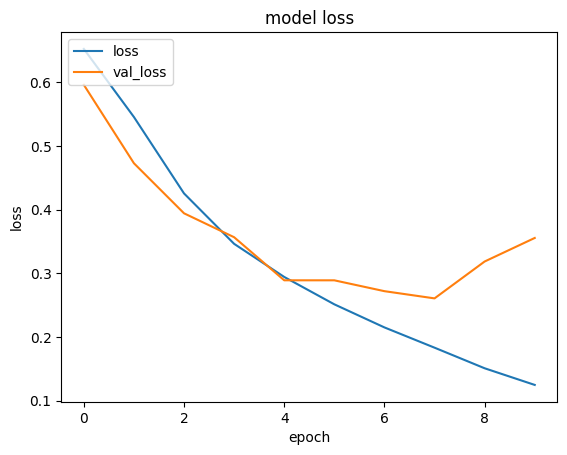

In [21]:
def plot_training_graphs():
  plt.plot(dvc_history.history['loss'])
  plt.plot(dvc_history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['loss', 'val_loss'], loc='upper left')
plot_training_graphs()

What can be observed about the curves (how do the values change along the curves, and how does the relationship between the curves change)? What does this mean?
```
# TODO:
```




How would you change the training based on this?

```
# TODO:
```

## T1.7 Evaluation

[Evaluate](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) the performance of our model on the test dataset:

In [ ]:
dvc_classification_loss, dvc_classification_acc = dvc_classification_model.evaluate(test_batches)

What is the accuracy of the model?
```
# TODO:
```
\
What does that mean?
```
# TODO:
```

## Prediction examples

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


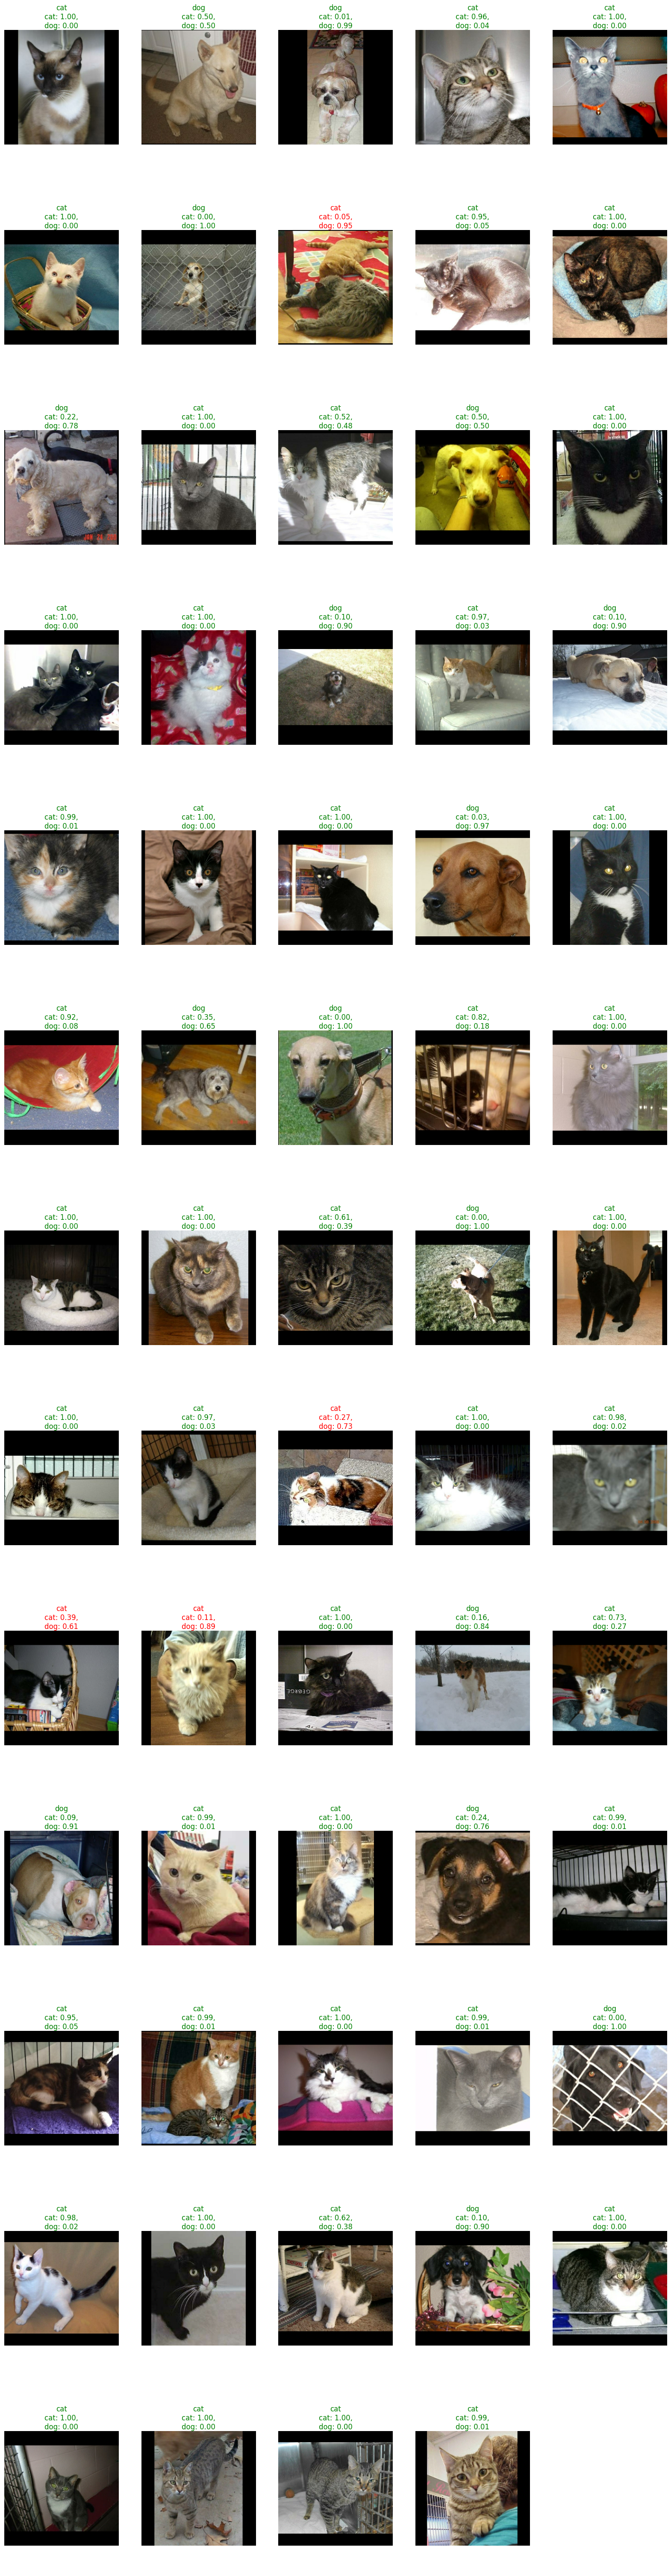

In [25]:
def plot_test_examples(test_ds, model):
  test_example_batch = test_batches.take(1)
  pred = np.squeeze(model.predict(test_example_batch))
  dog_probs = pred
  probs = np.stack([1-dog_probs, dog_probs]).T
  imgs, labels = list(test_example_batch)[0]
  n_examples = len(imgs)
  n_cols = 5
  n_rows = (n_examples-1)//5+1
  fig_test, axes_test = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows*6))
  axes_test_flatten = axes_test.flatten()
  [a.axis('off') for a in axes_test_flatten]
  for i in range(n_examples):
    axes_test_flatten[i].imshow(imgs[i])
    prob_text = ',\n'.join([f'{c}: {p:.2f}' for c, p in zip(classes, probs[i])])
    text = f'{classes[labels[i]]}\n{prob_text}'
    color = 'green' if np.argmax(probs[i]) == labels[i] else 'red'
    axes_test_flatten[i].set_title(text, wrap=True, color=color)

plot_test_examples(test_batches, dvc_classification_model)

If the accuracy measured on the test dataset is below `0.75`, improve the model! You can do this by changing the parameters. Suggestions:
- Number of convolutional layers
- Number of filters in the convolutional layers
- Number of fully connected layers / number of neurons in those layers
- Use of dropout layers after the max pooling layers
- Number of epochs

Tip: Generally, it's advisable to keep the number of model parameters not too high, especially regarding the parameters of the fully connected layer(s).

# T2. Explanation Generation for "Black-Box" Models

In this example, we will explore the explainability of complex model outputs through the "cats vs. dogs" image classification problem used in the previous task.

Considering that the number of parameters in neural network models can range from hundreds of thousands to billions for more complex problems (e.g., image processing or language models), understanding how a model works through direct examination of its parameters is extremely difficult, often impractical.

As a result, modern model explanation methods aim to determine which input parameters play a significant role in defining the model's output through some form of sensitivity analysis. This allows for insight into the "criteria" based on which the prediction was made.

The most common methods for explanation generation can be broadly categorized into two main groups: (1) model-agnostic methods, which focus solely on the model input and its corresponding output ("response"), and (2) model-specific methods, which take into account the model's structure and parameters during the sensitivity analysis.

Before starting the practical part, it's important to note that although we are dealing with explaining image classification models in this example, similar methods can be used to explain other types of models as well.

As a first preparatory step, let's reset the runtime environment and then install the necessary libraries (`lime` and `alibi`) and import them by running the following code blocks:


In [ ]:
%%capture

# delete previous variables:
%reset -f

# install required libraries:
!pip install alibi[tensorflow]
!pip install lime

# import required packages:
import os
import cv2
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from alibi.explainers import IntegratedGradients

Next, let's load the data and select a few images that we want to explain:

In [ ]:
IMAGE_RESOLUTION = 256

(train_dataset, val_dataset, test_dataset), dataset_info = \
            tfds.load('cats_vs_dogs',
                      split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
                      shuffle_files=False, with_info=True, as_supervised=True)

classes = dataset_info.features['label'].names  # label name of the classes
n_classes = len(classes)  # number of classes

test_images, test_labels = [], []

for img, lab in test_dataset.take(200):
    img_resized = tf.image.resize_with_pad(img, IMAGE_RESOLUTION, IMAGE_RESOLUTION) / 255.
    test_images.append(img_resized.numpy())
    test_labels.append(lab.numpy().flatten())

test_images = np.array(test_images)
test_labels = np.array(test_labels)

For this demonstration, we will use a modified and pre-trained version of the architecture used in the previous task, ensuring consistency in the results.

Let's load this model by running the following code block:

In [ ]:
!wget https://share.mit.bme.hu/index.php/s/kKPmMwjPLcB5TaT/download/dvc_model_revised.keras

dvc_classification_model = tf.keras.models.load_model("dvc_model_revised.keras")

dvc_classification_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy'])

## T2.1 Model-Agnostic Explanation - LIME - **Optional Task - iMSc**

First, let's explore the Local Interpretable Model-Agnostic Explanations (LIME) explanation method.

The operation of this method can be summarized in the following steps:

1. Sample the input space around the input to be explained (e.g., by adding random additive noise associated with the input).
2. Fix the model predictions at the sampled points.
3. Fit a simple (typically linear) model to the resulting input-output pairs, weighting the samples by the inverse of their distance from the original (input to be explained).
4. The resulting simple model is interpretable and is likely to mimic the behavior of the original model well in the vicinity of the examined input, thus aligning with the decision boundary. From the parameters of the simple model, we can determine the role of each input in shaping the classifier's decision.

The first three elements of the above process are summarized in the following figure:

![LIME image](https://raw.githubusercontent.com/marcotcr/lime/master/doc/images/lime.png)

Here, the input to be explained is marked with a red cross, samples taken from the input space are marked with crosses and circles, the original model's decision boundary is indicated by background coloring, and the decision boundary of the fitted explainable (linear) model is shown with a dashed line.

A detailed description of the LIME method can be found in the following [related publication](https://arxiv.org/pdf/1602.04938v3.pdf).

> In summary, the LIME method defines an interpretable model based solely on the inputs and the model's responses, which approximates the behavior of the model to be explained in the vicinity of the input. Since LIME does not require any assumptions about the internal workings of the model to be explained, it can be used to explain the output of any predictive model, making it a model-agnostic method.


In our case, we will use a variant of the LIME method specifically designed for image inputs, which, in addition to the previously introduced principles, segments the inputs into coherent regions based on texture, known as superpixels, and then determines the attributions of each superpixel. This preliminary step is critical because if we treated each of the hundreds of thousands of pixels in the image as separate variables, an extremely large number of samples would be needed to cover the local input space.

By default, LIME uses the Quickshift algorithm for superpixel segmentation, and the workings of this method are detailed in the following [related publication](https://link.springer.com/chapter/10.1007/978-3-540-88693-8_52).

In the following code block, we will define the LIME Explainer and generate explanations for 16 randomly selected images:

In [ ]:
correct_imgs_to_explain = 10
incorrect_imgs_to_explain = 6

test_predictions = dvc_classification_model.predict(test_images, verbose=0)

correct_preds_mask = test_predictions.flatten().round().astype(int) == test_labels.flatten()
imgs_correct, labels_correct = test_images[correct_preds_mask], test_labels[correct_preds_mask]
imgs_incorrect, labels_incorrect = test_images[np.logical_not(correct_preds_mask)], test_labels[np.logical_not(correct_preds_mask)]

random_selection_mask = np.full(len(imgs_correct), False)
random_selection_mask[:correct_imgs_to_explain] = True
np.random.shuffle(random_selection_mask)

selected_images, selected_labels = imgs_correct[random_selection_mask], labels_correct[random_selection_mask]

random_selection_mask = np.full(len(imgs_incorrect), False)
random_selection_mask[:incorrect_imgs_to_explain] = True
np.random.shuffle(random_selection_mask)

selected_images = np.concatenate((selected_images, imgs_incorrect[random_selection_mask]), axis=0)
selected_labels = np.concatenate((selected_labels, labels_incorrect[random_selection_mask]), axis=0)

explainer = lime_image.LimeImageExplainer()

test_explanations_lime, test_predictions = [], []

for img in selected_images:
  test_explanations_lime.append(explainer.explain_instance(img, lambda x: dvc_classification_model.predict(x, verbose=0), top_labels=1, num_samples=500))
  test_predictions.append(dvc_classification_model.predict(img[None, :, :, :], verbose=0))

The execution of the above code block may take up to 10 minutes.

While the explanations for the 16 images are being generated, please answer the following question:

**Based on preliminary assumptions, which parts of a given image are relevant, and which parts are irrelevant for classification?**
\
*Tip: Refer back to the example images plotted in the previous task.*

```
TODO:
```


Finally, let's visualize the most significant superpixels for both classes:

In [ ]:
num_superpixels_per_class = 5

fig, axes = plt.subplots(4, 4, figsize=(12, 16))

for prediction, explanation, label, ax in zip(np.array(test_predictions).flatten(), test_explanations_lime, selected_labels.flatten(), axes.flatten()):
    temp, mask_dog = explanation.get_image_and_mask(0, positive_only=True,
                                                    num_features=num_superpixels_per_class, hide_rest=False)
    temp, mask_cat = explanation.get_image_and_mask(0, positive_only=False, negative_only=True,
                                                    num_features=num_superpixels_per_class, hide_rest=False)

    mask_transparent = np.full(temp.shape[:2], np.nan)
    mask_transparent[mask_dog.astype(bool)] = 1
    mask_transparent[mask_cat.astype(bool)] = 0

    ax.imshow(temp)
    # Yellow: dog --- Blue: cat
    ax.imshow(mask_transparent, cmap="plasma", alpha=0.5)
    ax.axis("off")
    ax.set_title(f"{'cat' if label == 0 else 'dog'}\ncat:  {(1. - prediction):.2f}\ndog: {prediction:.2f}", color="green" if np.round(prediction) == label else "red")

plt.tight_layout()
plt.show();

In the above results, the most significant superpixels considered by the model are highlighted in yellow or blue. Yellow indicates the superpixels that push the model's decision towards class 1 (dog), while blue indicates those that push the decision towards class 0 (cat). Additionally, each image has a text representation of the model's prediction, with the color indicating whether the prediction is correct (green: correct prediction, red: incorrect prediction).

Note: For each class, the N most significant superpixels (default is 5) are highlighted. Therefore, superpixels from both classes are present in every image.

Based on the above information and results, try to answer the following questions:

**Do you see any correlation between the attributions provided by the LIME method ("explanations") and the model's decision, as well as the correctness of the model's decision? If so, what could be the reason for this?**

```
TODO:
```


**Is there any observable correlation between the model's uncertainty (i.e., how close the prediction is to the 0.5 "completely uncertain" value) and the attributions determined by LIME?**
```
TODO:
```


**How do the attributions change depending on the number of highlighted superpixels? What effect does any change have on the considerations raised in the previous questions?**
\
*Tip: The number of superpixels per class can be adjusted using the `num_superpixels_per_class` variable found at the beginning of the above code block, after which the code block should be re-executed. The default number of superpixels per class is 5.*

```
TODO:
```

## T2.2 Model-Specific Explanation - Integrated Gradients

The Integrated Gradients method leverages the property of neural networks that, ideally, the mappings they implement are fully differentiable (this is the same property used for training neural networks).

The method broadly consists of the following steps:
1. Identify a reference point in the input space (for image classification, this is typically a completely black image), and then interpolate a straight line segment between this reference point and the input to be explained.
2. Generate example inputs by moving along the interpolated line at specified intervals. - Each generated image will be a transition between the reference image and the input to be explained.
3. For each generated input, compute the output's derivative with respect to the input variables (pixels).
4. Estimate the integral of the resulting gradients over the interpolated segment. The value of this integral will be the attribution associated with that variable (indicating how much and in which direction it influences the output).

A detailed description of the method can be found in the related paper: [Axiomatic Attribution for Deep Networks](https://arxiv.org/pdf/1703.01365.pdf)

> It is important to note that the results of this method can depend significantly on the reference point used. More information about the impact of choosing a "baseline" (i.e., reference input) can be found on the following page: [Visualizing the Impact of Feature Attribution Baselines](https://distill.pub/2020/attribution-baselines/)

> Another important preliminary note is that the Integrated Gradients method determines input attributions at the pixel level, in contrast to the LIME method, which operates at the superpixel level due to the specifics of sampling.

The following code block initializes the class implementing the Integrated Gradients method and computes the attributions for the inputs selected in the previous example:


In [ ]:
ig = IntegratedGradients(dvc_classification_model,
                         layer=None,
                         method="gausslegendre",
                         n_steps=50,
                         internal_batch_size=100)

test_explanations_intgrad = []

for img, prediction in zip(selected_images, np.array(test_predictions).flatten()):
  test_explanations_intgrad.append(ig.explain(img[None, :, :, :], target=0))

Then let's visualize the obtained attribution values:


In [ ]:
inclusion_percentile = 5.
cutoff_rate = 0.25

fig, axes = plt.subplots(4, 4, figsize=(12, 16))

for prediction, explanation, label, image, ax in zip(np.array(test_predictions).flatten(), test_explanations_intgrad, selected_labels.flatten(), selected_images, axes.flatten()):
    avg_decolored_mask = explanation.attributions[0][0].mean(axis=-1)
    mask_dog = avg_decolored_mask < np.percentile(avg_decolored_mask, inclusion_percentile)
    mask_cat = avg_decolored_mask > np.percentile(avg_decolored_mask, 100. - inclusion_percentile)

    mask = mask_dog + mask_cat
    mask = np.tile(mask[:, :, None], 3).astype(np.uint8) * 255
    mask_blurred = cv2.GaussianBlur(mask, (13,13), 11)
    mask_blurred_capped = mask_blurred.mean(axis=-1)
    mask_blurred_capped[mask_blurred_capped < np.round(cutoff_rate * 255.)] = np.nan

    ax.imshow(image)
    ax.imshow(mask_blurred_capped, cmap="Reds", vmin=0, vmax=255, alpha=0.5)

    ax.axis("off")
    ax.set_title(f"{'cat' if label == 0 else 'dog'}\ncat:  {(1. - prediction):.2f}\ndog: {prediction:.2f}", color="green" if np.round(prediction) == label else "red")

plt.tight_layout()
plt.show();

Since the Integrated Gradients method assigns an attribution value to every pixel, the above visualization displays only the areas covered by the extreme pixel values, and the visibility of the displayed pixels is further enhanced by a Gaussian blur.

The `inclusion_percentile` variable at the beginning of the code block determines which attribution values falling below the lower percentile and above the upper percentile will be displayed. By default, its value is set to 5, meaning that attributions below the 5th percentile and above the 95th percentile are shown. This variable can range from 0 to 50.

The other variable that controls the display is `cutoff_rate`, which defines the minimum relative attribution value below which the attribution mask becomes fully transparent (so only the original pixel value is visible in the image). Its default value is 0.25 and can range from 0 to 1.

> Although the Integrated Gradients method (like LIME) can differentiate attributions for each class, these vary significantly pixel by pixel, so the attributed areas for the two classes almost always overlap. As a result, the display in the example above is based solely on the deviation of the attribution from 0, regardless of the classes.

Considering the above and the peculiarities of the methods, try answer the following questions:

**Do you see a relationship between the correctness of the classification and the attributions? How do the attribution masks differ from those seen in LIME?**

```
TODO:
```


**What is the difference between the attribution masks observed here and the attributions seen in LIME concerning the image characteristics? How does this relationship depend on the parameters set for visualization at the beginning of the code block?**
\
*Tip: Notice how well the masks produced by each method align with the natural "boundaries" (edges) present in the image.*

```
TODO:
```

# S1. __Task Submission__

In this assignment, the goal is to classify fashion items based on images using a neural network.

## S1.1 Task Description
The dataset is available [here](https://github.com/zalandoresearch/fashion-mnist). A brief description is also provided there. The grayscale images depict shoes, clothing, t-shirts, and bags sourced from Zalando (a fashion retail company). The aim is to achieve the highest possible prediction accuracy, which will be measured based on accuracy.

The training dataset can be accessed on the [above](https://github.com/zalandoresearch/fashion-mnist) page (images: `train-images-idx3-ubyte.gz`, labels: `train--images--idx3--ubyte.gz`, loading [instructions here](https://github.com/zalandoresearch/fashion-mnist?tab=readme-ov-file#loading-data-with-python-requires-numpy)), or it can also be loaded using libraries, such as [TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) [as shown here](https://github.com/zalandoresearch/fashion-mnist?tab=readme-ov-file#loading-data-with-tensorflow) (this is the recommended solution). The test dataset can be downloaded from Moodle. The link to the dataset is located under the "Dataset assignment" in the lab section (which is a 0-point quiz). [Link to Moodle](https://edu.vik.bme.hu/mod/quiz/view.php?id=150963)  
The test dataset can be loaded in Python as follows:

```python
x_test = np.load('x_test_xyz.npy')

```

Scoring will be based on accuracy: linearly between 0.7 and 0.95, and outside this range, the accuracy is determined using nearest neighbor interpolation.

## S1.2 Submission
You need to upload a `.npy` file containing the predicted values to the Moodle platform, specifically a 1D integer vector of class indices. You can easily achieve this in Python using NumPy with the `np.save` function:
```
np.save('y_test.npy', y_test)
```
## S1.3 Useful Information

### Solution Environment
The recommended environment for this task is Google Colaboratory, where you can run iPython notebooks. It is also suggested to use the TensorFlow environment for building and training the neural network.

### Files
The `x_test_xxxxxx.npy` file downloaded from Moodle contains the test dataset, which consists of $9000$ images of size ($28 \times 28$) stored in a tensor of shape ($9000 \times 28 \times 28$).

### Data Preprocessing
Neural networks learn more effectively when the data is normalized. For images, this typically means scaling the intensity values of the image channels to the range of \(0-1\).


Submission:

https://edu.vik.bme.hu/mod/quiz/view.php?id=152398
